# Code for Spain Summary Graphs

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt    

In [21]:
# loading datasets
summary_data = pd.read_csv('spain_summary.csv')
age_data = pd.read_csv('spain_age_gender_total.csv')

## Processing ```summary-statistics``` Table

In [3]:
# replace NA with 0
summary_data = summary_data.fillna(0)

# date from string to date_time_objet
summary_data['date'] = pd.to_datetime(summary_data['date'])

# create fraction_hospitalized and fraction_icu columns
summary_data["frac_hospitalized"] = summary_data["hospitalized"]/summary_data["cases"]
summary_data["frac_icu"] = summary_data["icu"]/summary_data["cases"]

**PLOT 1**  
The following plot is for cases over time, with recoveries and mortality

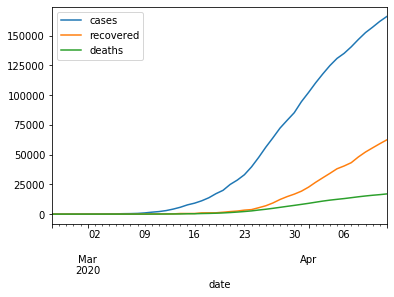

In [16]:

plt.figure()
summary_data.set_index('date')['cases'].plot()
summary_data.set_index('date')['recovered'].plot()
summary_data.set_index('date')['deaths'].plot()
plt.legend(loc='best')

**PLOT 2**  
The following plot is for fraction of hospitalization and fraction ICU -- for available dates.

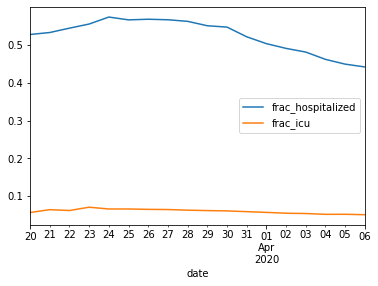

In [17]:
to_plot = summary_data.iloc[24:42]
plt.figure()
to_plot.set_index('date')['frac_hospitalized'].plot()
to_plot.set_index('date')['frac_icu'].plot()
plt.legend(loc='best')

## Processing ```age-range``` Table

In [22]:
# replace NA with 0
age_data = age_data.fillna(0)

# date from string to date_time_objet
age_data['date'] = pd.to_datetime(age_data['date'])

# create fraction_hospitalized and fraction_icu columns
age_data["frac_hospitalized"] = age_data["hospitalized"]/age_data["cases"]
age_data["frac_icu"] = age_data["icu"]/age_data["cases"]

In [37]:
# selecting both gender data
relevant = age_data.where(age_data['sex']=='both').dropna()
print(relevant)

          date age_range   sex     cases  hospitalized     icu  deaths  \
0   2020-03-23       0-9  both     129.0          34.0     1.0     0.0   
1   2020-03-23     10-19  both     221.0          15.0     0.0     1.0   
2   2020-03-23     20-29  both    1285.0         183.0     8.0     4.0   
3   2020-03-23     30-39  both    2208.0         365.0    15.0     3.0   
4   2020-03-23     40-49  both    2919.0         663.0    40.0     9.0   
5   2020-03-23     50-59  both    3129.0         936.0    89.0    20.0   
6   2020-03-23     60-69  both    2916.0        1230.0   132.0    63.0   
7   2020-03-23     70-79  both    3132.0        1678.0   165.0   164.0   
8   2020-03-23    80 y +  both    3020.0        1710.0    34.0   541.0   
9   2020-03-23     Total  both   18959.0        6814.0   484.0   805.0   
30  2020-03-24       0-9  both     130.0          35.0     1.0     0.0   
31  2020-03-24     10-19  both     226.0          20.0     1.0     1.0   
32  2020-03-24     20-29  both    1352

**PLOT 3**
To plot cases by date for each age range

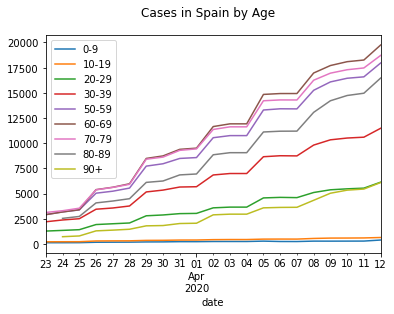

In [50]:
fig = plt.figure()
to_plot = relevant.where(age_data['age_range'] == '0-9').dropna()
to_plot.set_index('date')['cases'].plot(label='0-9')
to_plot = relevant.where(age_data['age_range'] == '10-19').dropna()
to_plot.set_index('date')['cases'].plot(label='10-19')
to_plot = relevant.where(age_data['age_range'] == '20-29').dropna()
to_plot.set_index('date')['cases'].plot(label='20-29')
to_plot = relevant.where(age_data['age_range'] == '30-39').dropna()
to_plot.set_index('date')['cases'].plot(label='30-39')
to_plot = relevant.where(age_data['age_range'] == '40-49').dropna()
to_plot.set_index('date')['cases'].plot(label='50-59')
to_plot = relevant.where(age_data['age_range'] == '60-69').dropna()
to_plot.set_index('date')['cases'].plot(label='60-69')
to_plot = relevant.where(age_data['age_range'] == '70-79').dropna()
to_plot.set_index('date')['cases'].plot(label='70-79')
to_plot = relevant.where(age_data['age_range'] == '80-89').dropna()
to_plot.set_index('date')['cases'].plot(label='80-89')
to_plot = relevant.where(age_data['age_range'] == '90 y +').dropna()
to_plot.set_index('date')['cases'].plot(label='90+')
fig.suptitle('Cases in Spain by Age') 
plt.legend(loc='best')

**PLOT 4**
Hospitalization in Spain by age

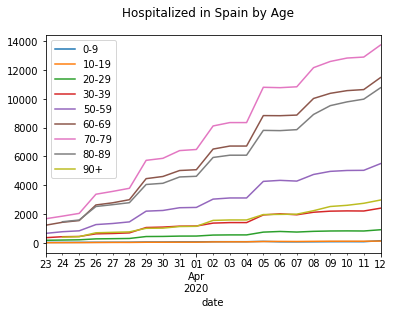

In [51]:
fig = plt.figure()
to_plot = relevant.where(age_data['age_range'] == '0-9').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='0-9')
to_plot = relevant.where(age_data['age_range'] == '10-19').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='10-19')
to_plot = relevant.where(age_data['age_range'] == '20-29').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='20-29')
to_plot = relevant.where(age_data['age_range'] == '30-39').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='30-39')
to_plot = relevant.where(age_data['age_range'] == '40-49').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='50-59')
to_plot = relevant.where(age_data['age_range'] == '60-69').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='60-69')
to_plot = relevant.where(age_data['age_range'] == '70-79').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='70-79')
to_plot = relevant.where(age_data['age_range'] == '80-89').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='80-89')
to_plot = relevant.where(age_data['age_range'] == '90 y +').dropna()
to_plot.set_index('date')['hospitalized'].plot(label='90+')
fig.suptitle('Hospitalized in Spain by Age') 
plt.legend(loc='best')

**PLOT 5**
ICU admits in spain by age

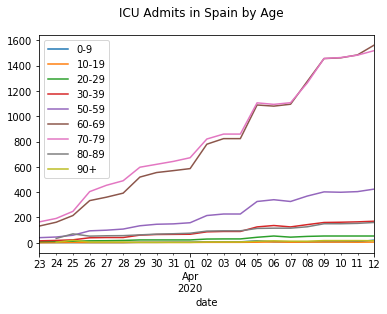

In [52]:
fig = plt.figure()
to_plot = relevant.where(age_data['age_range'] == '0-9').dropna()
to_plot.set_index('date')['icu'].plot(label='0-9')
to_plot = relevant.where(age_data['age_range'] == '10-19').dropna()
to_plot.set_index('date')['icu'].plot(label='10-19')
to_plot = relevant.where(age_data['age_range'] == '20-29').dropna()
to_plot.set_index('date')['icu'].plot(label='20-29')
to_plot = relevant.where(age_data['age_range'] == '30-39').dropna()
to_plot.set_index('date')['icu'].plot(label='30-39')
to_plot = relevant.where(age_data['age_range'] == '40-49').dropna()
to_plot.set_index('date')['icu'].plot(label='50-59')
to_plot = relevant.where(age_data['age_range'] == '60-69').dropna()
to_plot.set_index('date')['icu'].plot(label='60-69')
to_plot = relevant.where(age_data['age_range'] == '70-79').dropna()
to_plot.set_index('date')['icu'].plot(label='70-79')
to_plot = relevant.where(age_data['age_range'] == '80-89').dropna()
to_plot.set_index('date')['icu'].plot(label='80-89')
to_plot = relevant.where(age_data['age_range'] == '90 y +').dropna()
to_plot.set_index('date')['icu'].plot(label='90+')
fig.suptitle('ICU Admits in Spain by Age') 
plt.legend(loc='best')

**PLOT 6**
Deaths in Spain by age

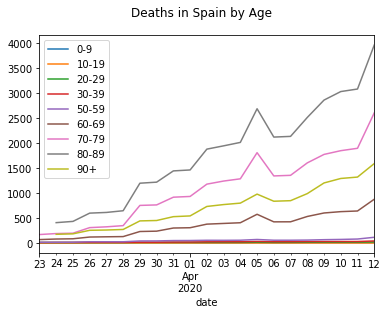

In [53]:
fig = plt.figure()
to_plot = relevant.where(age_data['age_range'] == '0-9').dropna()
to_plot.set_index('date')['deaths'].plot(label='0-9')
to_plot = relevant.where(age_data['age_range'] == '10-19').dropna()
to_plot.set_index('date')['deaths'].plot(label='10-19')
to_plot = relevant.where(age_data['age_range'] == '20-29').dropna()
to_plot.set_index('date')['deaths'].plot(label='20-29')
to_plot = relevant.where(age_data['age_range'] == '30-39').dropna()
to_plot.set_index('date')['deaths'].plot(label='30-39')
to_plot = relevant.where(age_data['age_range'] == '40-49').dropna()
to_plot.set_index('date')['deaths'].plot(label='50-59')
to_plot = relevant.where(age_data['age_range'] == '60-69').dropna()
to_plot.set_index('date')['deaths'].plot(label='60-69')
to_plot = relevant.where(age_data['age_range'] == '70-79').dropna()
to_plot.set_index('date')['deaths'].plot(label='70-79')
to_plot = relevant.where(age_data['age_range'] == '80-89').dropna()
to_plot.set_index('date')['deaths'].plot(label='80-89')
to_plot = relevant.where(age_data['age_range'] == '90 y +').dropna()
to_plot.set_index('date')['deaths'].plot(label='90+')
fig.suptitle('Deaths in Spain by Age') 
plt.legend(loc='best')

**PLOT 7**
Fraction Hospitalized in Spain by Age

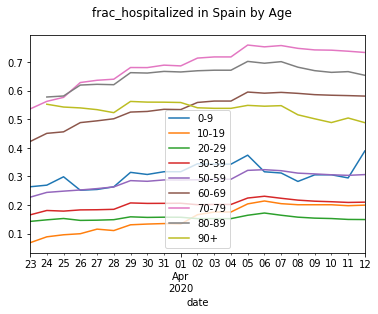

In [54]:
fig = plt.figure()
to_plot = relevant.where(age_data['age_range'] == '0-9').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='0-9')
to_plot = relevant.where(age_data['age_range'] == '10-19').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='10-19')
to_plot = relevant.where(age_data['age_range'] == '20-29').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='20-29')
to_plot = relevant.where(age_data['age_range'] == '30-39').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='30-39')
to_plot = relevant.where(age_data['age_range'] == '40-49').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='50-59')
to_plot = relevant.where(age_data['age_range'] == '60-69').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='60-69')
to_plot = relevant.where(age_data['age_range'] == '70-79').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='70-79')
to_plot = relevant.where(age_data['age_range'] == '80-89').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='80-89')
to_plot = relevant.where(age_data['age_range'] == '90 y +').dropna()
to_plot.set_index('date')['frac_hospitalized'].plot(label='90+')
fig.suptitle('frac_hospitalized in Spain by Age') 
plt.legend(loc='best')

**PLOT 8**
Fraction in ICU in Spain by age

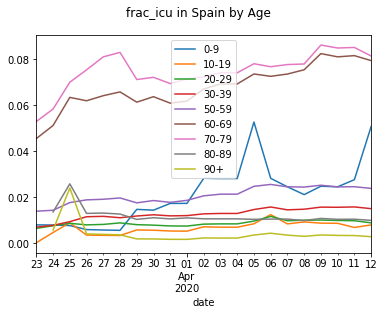

In [55]:
fig = plt.figure()
to_plot = relevant.where(age_data['age_range'] == '0-9').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='0-9')
to_plot = relevant.where(age_data['age_range'] == '10-19').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='10-19')
to_plot = relevant.where(age_data['age_range'] == '20-29').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='20-29')
to_plot = relevant.where(age_data['age_range'] == '30-39').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='30-39')
to_plot = relevant.where(age_data['age_range'] == '40-49').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='50-59')
to_plot = relevant.where(age_data['age_range'] == '60-69').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='60-69')
to_plot = relevant.where(age_data['age_range'] == '70-79').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='70-79')
to_plot = relevant.where(age_data['age_range'] == '80-89').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='80-89')
to_plot = relevant.where(age_data['age_range'] == '90 y +').dropna()
to_plot.set_index('date')['frac_icu'].plot(label='90+')
fig.suptitle('frac_icu in Spain by Age') 
plt.legend(loc='best')